# Regularyzacja
Wraz z rozwojem kolejnych technik modelowania i wzrostem rozmiarów dostępnych zbiorów danych problem nadmiernego dopasowania systematycznie wzrastał. Liczba parametrów w estymowanych modelach wzrasta często do tego stopnia, że overfitting poważnie ogranicza moc predykcyjną modelu. Jednym z pomysłów na rozwiązanei tego problemu jest regularyzacja.

Regularyzacja to nic innego jak włączenie do funkcji straty informacji o wielkości parametrów w modelu. Załóżmy, że  estymator $\hat{F}(X)$ dobiera wektor parametrów $\hat{\beta}$ aby minimalizować $L(y-\hat{y})$. Regularyzacja rozszerza funkcję straty, tak że $L' = L(y-\hat{y}) + R(\hat{\beta})$. Gdzie $R(\hat{\beta})$ to dotakowy koszt generowany przez wektor parametrów $\hat{\beta}$ - regularyzacja.

## Dlaczego regularyzować model
Wprowadzenie regularyzacji do modelu ma na celu rozwiązanie problemu nadmiernego dopasowania, który wynika z wariancji oszacowań powstałej w wyniku elastyczności estmatora pochodzącej z nadmiernej liczby lub wielkości parametrów. Co powoduje, że dodanie kosztu, zależnego od liczby i wielkości parametrów, pomaga w tym problemie?

Wyobraźmy sobie, że jesteśmy optymalizatorem budującym dany estymator $\hat{F}(X)$. Kiedy wprowadzanie kolejnych nawet najmniejszych zmian w naszym estymatorze "nic nas nie kosztuje", będziemy go zmieniać tak długo aż stiwerdizmy, że nic już się nie da poprawić. Pamiętajmy, że w uczeniu nadzorowanym estmator bazuje na zbiorze treningowym. Uczenie polega tak naprawdę na dopasowywaniu estymatora w taki sposób aby tłumaczył powstawanie obserwacji w zbiorze treningowym. To zbliża $\hat{F}(X)$ do prawdziwego $F(X)$ poniekąd przy okazji. Metoda uczenia nadzorowanego działa, poniewaz zwykle najprościej wytłumaczyć obserwacje w zbiorze treningowym zasadami, które pokrywają się z prawdą.

Przykładowo, gdyby naszym celem było wytłumaczenie wagi osób w populacji i mielibyśmy możliwośc zastosowania tylko jednej reguły, to prawdopodobnie powiedzielibyśmy, że im wyższa osoba tym cięższa. Gdy ktoś pozowli nam dodać drugą regułą to pewnie powiemy, że mężczyźni są ciężsi niż kobiety, itd. W pewnym momencie pomysły na "sensowne" reguły się jednak kończą i dalej możemy już wymyślać tylko reguły które de facto opisują populacje w zbiorze treningowym, a nie ogólne prawidłowości.

Spowodowanie, że dodwania kolejnych reguł jest kosztowne powoduje, że estymator "bierze pod uwagę" trade off pomiędzy kosztem wprowadzenia reguły a tym jak bardzo jej wprowadzenie poprawia funkcję straty. W zależności od wysokości kosztu i skuteczności reguły może zrezygnować z jej wprowadzania. Dodatkowo "w pierwszej kolejności" wprowadzi jedynie te reguły które najmocniej redukują funkcję straty.


## Regularyzacja L1 i L2
Załóżmy, że funkcja straty opisana jest następującym wzorem
$$L' = L(y-\hat{y}) + R(\hat{\beta})$$
gdzie $L(y-\hat{y})$ to funkcja straty bez regularyzacji, a $R(\hat{\beta})$ to nasze wyrażenie regularyzacyjne. 

Zwykle stosować będziemy jedną z trzech form regularyzacji, $L_1$ (Lasso), $L_2$ (Ridge) lub kombinacji $L_1$ i $L_2$ tzw. *Elastyc Net*.
* Lassto:
$$R_{L_1} = \alpha \sum_{i=0}^{k} |\beta_i|$$
* Ridge
$$R_{L_2} = \alpha \sum_{i=0}^{k} |\beta_i|^2$$
* Elastic Net 
$$R_{EN} = \alpha \sum_{i=0}^{k} [\gamma|\beta_i| + (1-\gamma)|\beta_i|^2]$$

* Kiedy wprowadzamy regularyzację, znalezienie optymalnaych parametrów nie jest możliwe analitycznie. Konieczne jest stosowanie optymalizacji numerycznej.
* Kiedy stosujemy wyłącznie regularyzację L1 możliwe jest istienie kilku optymalnych rozwiązań.
* Stosowanie Elastic Net często prowadzi do grupowania zmiennych - zmienne skorelowane otrzymują podobne wagi.

### Lasso, Ridge i Elastic Net
Te trzy metody różnią się nie tylko formą funkcyjną, ale również sposobem docierania do optymalnego rozwiązania. W przypadku Lasso nie tylko zmniejszane są parametry modelu, ale de facto przeprowadzana jest również zelekcja, gdyż elementy mogą osiągnąć zero.


## Regularyzacja przy dużej liczbie zmiennych
Wykorzystamy dane pogodowe, opisujące temperaturę w Mediolanie w każdej godzinie dni grudniowych.

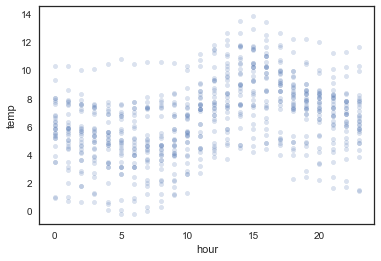

In [181]:
import pandas as pd
milanoTemp = pd.read_csv("datasets/milanoDecTemp.csv")
milanoTemp.plot.scatter("hour", "temp", alpha=0.2)

### Benchmark
Sprawdźmy jak zachowa się model regresji liniowej bez regularyzacji, kiedy jako zmienne objasniające wykorzystywane będą kolejne stopnie wielomianu

In [1]:
from sklearn.linear_model import LinearRegression

In [2]:
features = ["hour"]
preds = []
coefs = []
hours = pd.DataFrame(list(range(24)), columns=["hour"])

for power in range (2, 11):
    milanoTemp["hour"+str(power)] = milanoTemp.hour**power 
    hours["hour"+str(power)] = hours.hour**power 
    features.append("hour"+str(power))
    regr = linear_model.LinearRegression()
    regr.fit(milanoTemp[features], milanoTemp["temp"])
    pred = regr.predict(hours[features])
    preds.append(pred)
    coefs.append(dict(zip(hours.columns, regr.coef_)))
coefs = pd.DataFrame(coefs)[hours.columns.tolist()]
coefs

NameError: name 'pd' is not defined

Możemy zaobserwować kilka zjawisk. Przede wszystkim współczynniki rosną, średnio rzecz biorąc, wraz z dodawaniem kolejnych zmiennych. Widać to szczególnie mocno na zmiennych 5-8 stopnia. Dodatkowo nasz wieloman zaczyna miieć sporą łatwość lokalnego dopasowywania, co również widać najlepiej dla wielomianów 5-7 stopnia na rysunku poniżej.

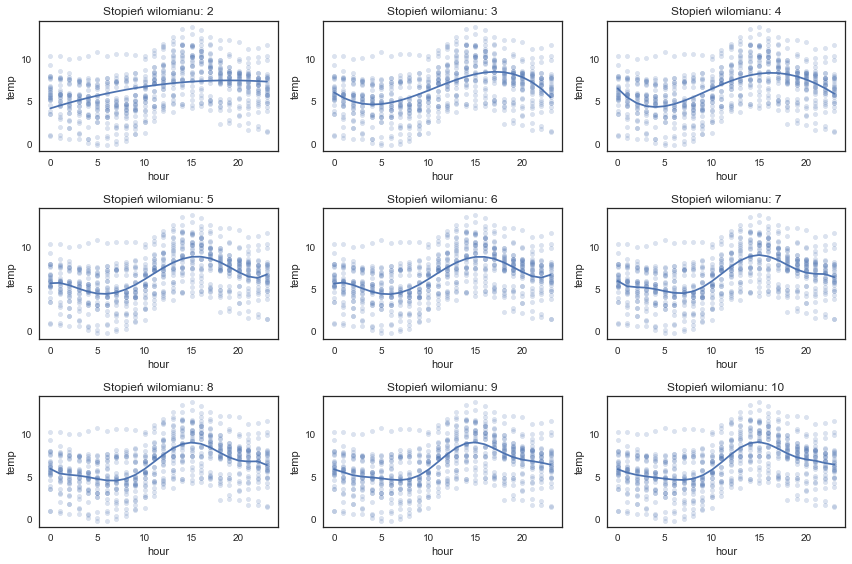

In [189]:
fig, ax = plt.subplots(3, 3, figsize=(12,8))
ax = ax.flatten()
for i, axe in enumerate(ax):
    milanoTemp.plot.scatter("hour", "temp", alpha=0.2, ax=axe)
    axe.plot(preds[i])
    axe.set_title("Stopień wilomianu: {0}".format(i+2))

plt.tight_layout()
plt.show()


In [194]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import random
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))
for alpha in [0.1, 0.5, 2, 5, 10, 20, 100]:
    rmse = []
    rmseT = []
    for train, test in kf.split(milanoTemp.index.values):
        reg = linear_model.LinearRegression()
        reg.fit(milanoTemp.iloc[train][features], milanoTemp.iloc[train]["temp"])
        predsTrain = reg.predict(milanoTemp.iloc[train][features])
        preds = reg.predict(milanoTemp.iloc[test][features])
        rmse.append(mean_squared_error(milanoTemp.iloc[test].temp, preds))
        rmseT.append(mean_squared_error(milanoTemp.iloc[train].temp, predsTrain))
    print(alpha, np.mean(rmseT), np.mean(rmse))


0.1 4.910777326402238 5.106638228690011
0.5 4.910777326402238 5.106638228690011
2 4.910777326402238 5.106638228690011
5 4.910777326402238 5.106638228690011
10 4.910777326402238 5.106638228690011
20 4.910777326402238 5.106638228690011
100 4.910777326402238 5.106638228690011


In [190]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import random
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))
for alpha in [0.1, 0.5, 2, 5, 10, 20, 100]:
    rmse = []
    rmseT = []
    for train, test in kf.split(milanoTemp.index.values):
        reg = linear_model.Ridge (alpha = alpha)
        reg.fit(milanoTemp.iloc[train][features], milanoTemp.iloc[train]["temp"])
        predsTrain = reg.predict(milanoTemp.iloc[train][features])
        preds = reg.predict(milanoTemp.iloc[test][features])
        rmse.append(mean_squared_error(milanoTemp.iloc[test].temp, preds))
        rmseT.append(mean_squared_error(milanoTemp.iloc[train].temp, predsTrain))
    print(alpha, np.mean(rmseT), np.mean(rmse))


0.1 4.91272851219034 5.091881223793763
0.5 4.912919069306814 5.089479935946828
2 4.913267737595433 5.086920733170264
5 4.913582630193053 5.085038643912037
10 4.914015209576524 5.083407267094791
20 4.914731409852652 5.08178438474317
100 4.916834700517609 5.078961875270147


In [154]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import random
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))
for alpha in [0.01, 0.1, 0.25, 0.5, 1, 2, 5]:
    rmse = []
    rmseT = []
    for train, test in kf.split(milanoTemp.index.values):
        reg = linear_model.Lasso (alpha = alpha)
        reg.fit(milanoTemp.iloc[train][features], milanoTemp.iloc[train]["temp"])
        predsTrain = reg.predict(milanoTemp.iloc[train][features])
        preds = reg.predict(milanoTemp.iloc[test][features])
        rmse.append(mean_squared_error(milanoTemp.iloc[test].temp, preds))
        rmseT.append(mean_squared_error(milanoTemp.iloc[train].temp, predsTrain))
    print(alpha, np.mean(rmseT), np.mean(rmse))


/home/wilam/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.01 5.063044048483975 5.139047407089973
0.1 5.071750939890799 5.145853436226739
0.25 5.123116346215445 5.194848686882905
0.5 5.252796002511286 5.315829483953523
1 5.251889769548066 5.315129827801414
2 5.259848867573769 5.322618958325033
5 5.2695975388744625 5.330209608284166


In [156]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import random
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))
for alpha in [0.01, 0.1, 0.25, 0.5, 1, 2, 5]:
    rmse = []
    rmseT = []
    for train, test in kf.split(milanoTemp.index.values):
        reg = linear_model.ElasticNet (alpha = alpha)
        reg.fit(milanoTemp.iloc[train][features], milanoTemp.iloc[train]["temp"])
        predsTrain = reg.predict(milanoTemp.iloc[train][features])
        preds = reg.predict(milanoTemp.iloc[test][features])
        rmse.append(mean_squared_error(milanoTemp.iloc[test].temp, preds))
        rmseT.append(mean_squared_error(milanoTemp.iloc[train].temp, predsTrain))
    print(alpha, np.mean(rmseT), np.mean(rmse))


/home/wilam/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.01 5.060064196275812 5.167102217198043
0.1 5.06571867619713 5.172915883003982
0.25 5.091276626920276 5.199087391355905
0.5 5.154109967625232 5.263217982013522
1 5.248043130463486 5.34606201619569
2 5.246109990225516 5.341086370516618
5 5.259280725005146 5.350673570842771


In [192]:
features = ["hour"]
preds = []
coefsL = []
hours = pd.DataFrame(list(range(24)), columns=["hour"])

for power in range (2, 11):
    milanoTemp["hour"+str(power)] = milanoTemp.hour**power 
    hours["hour"+str(power)] = hours.hour**power 
    features.append("hour"+str(power))
    regr = linear_model.Lasso (alpha = 10)
    regr.fit(milanoTemp[features], milanoTemp["temp"])
    pred = regr.predict(hours[features])
    preds.append(pred)
    coefsL.append(dict(zip(hours.columns, regr.coef_)))
coefsL = pd.DataFrame(coefsL)[hours.columns.tolist()]



/home/wilam/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [193]:
features = ["hour"]
preds = []
coefsR = []
hours = pd.DataFrame(list(range(24)), columns=["hour"])

for power in range (2, 11):
    milanoTemp["hour"+str(power)] = milanoTemp.hour**power 
    hours["hour"+str(power)] = hours.hour**power 
    features.append("hour"+str(power))
    regr = linear_model.Ridge (alpha = 10)
    regr.fit(milanoTemp[features], milanoTemp["temp"])
    pred = regr.predict(hours[features])
    preds.append(pred)
    coefsR.append(dict(zip(hours.columns, regr.coef_)))
coefsR = pd.DataFrame(coefsR)[hours.columns.tolist()]
print("Bez regularyzacji:")
display(coefs)
print("Lasso:")
display(coefsL)
print("Ridge")
display(coefsR)




Bez regularyzacji:


hour     hour2     hour3     hour4     hour5         hour6  \
0  0.348057 -0.009156       NaN       NaN       NaN           NaN   
1 -0.750489  0.112327 -0.003515       NaN       NaN           NaN   
2 -1.240716  0.212450 -0.010355  0.000148       NaN           NaN   
3  0.283658 -0.288461  0.049242 -0.002788  0.000051           NaN   
4  0.405457 -0.347770  0.060002 -0.003680  0.000085 -4.966826e-07   
5 -1.143526  0.707940 -0.210229  0.029497 -0.002017  6.577101e-05   
6 -0.945733  0.527336 -0.148372  0.019058 -0.001056  1.661494e-05   
7 -0.099351 -0.467157  0.288507 -0.077198  0.010907 -8.600112e-04   
8 -0.480258  0.087444 -0.013348  0.006366 -0.002451  4.462237e-04   

          hour7         hour8         hour9        hour10  
0           NaN           NaN           NaN           NaN  
1           NaN           NaN           NaN           NaN  
2           NaN           NaN           NaN           NaN  
3           NaN           NaN           NaN           NaN  
4           NaN           NaN           NaN           NaN  
5 -8.224628e-07           NaN           NaN           NaN  
6  4.900171e-07 -1.425824e-08           NaN           NaN  
7  3.803339e-05 -8.830760e-07  8.389369e-09           NaN  
8 -4.131290e-05  2.037611e-06 -5.125208e-08  5.183716e-10

Lasso:


hour     hour2     hour3     hour4         hour5         hour6  \
0   0.0  0.004556       NaN       NaN           NaN           NaN   
1   0.0  0.024765 -0.000922       NaN           NaN           NaN   
2  -0.0  0.000000  0.002554 -0.000109           NaN           NaN   
3  -0.0  0.000000  0.002213 -0.000076 -7.914800e-07           NaN   
4  -0.0  0.000000  0.002736 -0.000104 -2.190056e-06  7.253468e-08   
5  -0.0  0.000000  0.003188 -0.000108 -3.419161e-06 -5.446824e-09   
6  -0.0 -0.000000  0.003238 -0.000089 -3.826815e-06 -5.620020e-08   
7  -0.0 -0.000000  0.003037 -0.000063 -3.715132e-06 -7.944350e-08   
8  -0.0 -0.000000  0.002783 -0.000043 -3.436544e-06 -8.644745e-08   

          hour7         hour8         hour9        hour10  
0           NaN           NaN           NaN           NaN  
1           NaN           NaN           NaN           NaN  
2           NaN           NaN           NaN           NaN  
3           NaN           NaN           NaN           NaN  
4           NaN           NaN           NaN           NaN  
5  4.574529e-09           NaN           NaN           NaN  
6  1.541186e-09  1.884668e-10           NaN           NaN  
7 -2.449647e-10  9.053837e-11  6.695168e-12           NaN  
8 -1.125679e-09  3.560964e-11  3.852775e-12  2.201896e-13

Ridge


hour     hour2     hour3     hour4     hour5         hour6  \
0  0.346550 -0.009095       NaN       NaN       NaN           NaN   
1 -0.732045  0.110511 -0.003466       NaN       NaN           NaN   
2 -1.136725  0.194247 -0.009229  0.000126       NaN           NaN   
3  0.214480 -0.269253  0.047190 -0.002694  0.000049           NaN   
4  0.224818 -0.274892  0.048272 -0.002787  0.000053 -5.377987e-08   
5 -0.453457  0.327007 -0.124888  0.019972 -0.001456  4.906526e-05   
6 -0.289881  0.056718 -0.009774 -0.001937  0.000724 -6.866510e-05   
7 -0.240755 -0.236809  0.179213 -0.052600  0.007844 -6.368835e-04   
8 -0.204739 -0.115526  0.050510 -0.004187 -0.001472  3.967846e-04   

          hour7         hour8         hour9        hour10  
0           NaN           NaN           NaN           NaN  
1           NaN           NaN           NaN           NaN  
2           NaN           NaN           NaN           NaN  
3           NaN           NaN           NaN           NaN  
4           NaN           NaN           NaN           NaN  
5 -6.245725e-07           NaN           NaN           NaN  
6  2.648949e-06 -3.669578e-08           NaN           NaN  
7  2.856338e-05 -6.661409e-07  6.316201e-09           NaN  
8 -4.029577e-05  2.053871e-06 -5.241538e-08  5.341010e-10

## Regularyzacja przy dużej liczbie zmiennych z korlacjami
### Communities
W tym przykładzie wykorzystamy zbiór danych z UCI dotyczacy poziomu przestępczości w wybranych społecznościach.

Description:
Many variables are included so that algorithms that select or learn weights for attributes could be tested. However, clearly unrelated attributes were not included;  attributes were picked if there was any plausible connection to crime (N=122), plus  the attribute to be predicted (Per Capita Violent Crimes). The variables included in  the dataset involve the community, such as the percent of the population considered  urban, and the median family income, and involving law enforcement, such as per capita  number of police officers, and percent of officers assigned to drug units.

All numeric data was normalized into  the decimal range 0.00-1.00 using an Unsupervised, equal-interval binning method.  Attributes retain their distribution and skew (hence for example the population  attribute has a mean value of 0.06 because most communities are small).

W calym zbiorze danych są 122 zmienne objasniające. Ograniczymy naszą analizę do 96 zmiennych.

In [162]:
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
%matplotlib inline
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
%matplotlib inline

comm = pd.read_csv("datasets/communities.csv", decimal=",")
# features = comm.columns.tolist()[4:-1]
# features = comm[features].isnull().sum().sort_values().index.tolist()[:-23]
print(comm.shape)
features = ['fold', 'PctHousOccup', 'HousVacant', 'MedNumBR', 'PctHousLess3BR', 'PctPersDenseHous', 'PctPersOwnOccup', 'PersPerRentOccHous', 'PersPerOwnOccHous', 'PersPerOccupHous', 'PctLargHouseOccup', 'PctLargHouseFam', 'PctNotSpeakEnglWell', 'LemasPctOfficDrugUn', 'PctRecImmig10', 'PctRecImmig8', 'PctRecImmig5', 'PctRecentImmig', 'PctImmigRec10', 'PctImmigRec8', 'PctImmigRec5', 'PctImmigRecent', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctUsePubTrans', 'PopDens', 'LandArea', 'PctSameState85', 'PctSameCity85', 'PctSameHouse85', 'PctBornSameState', 'PctForeignBorn', 'NumStreet', 'NumInShelters', 'NumImmig', 'MedOwnCostPctIncNoMtg', 'MedRentPctHousInc', 'MedRent', 'RentHighQ', 'RentMedian', 'RentLowQ', 'OwnOccHiQuart', 'OwnOccMedVal', 'OwnOccLowQuart', 'PctWOFullPlumb', 'PctHousNoPhone', 'MedOwnCostPctInc', 'PctIlleg', 'PctSpeakEnglOnly', 'PctWorkMom', 'whitePerCap', 'perCapInc', 'medFamInc', 'pctWRetire', 'pctWPubAsst', 'pctWSocSec', 'pctWInvInc', 'pctWFarmSelf', 'NumIlleg', 'medIncome', 'blackPerCap', 'pctUrban', 'agePct65up', 'agePct16t24', 'agePct12t29', 'agePct12t21', 'householdsize', 'population', 'numbUrban', 'indianPerCap', 'pctWWage', 'FemalePctDiv', 'PctTeen2Par', 'PctKids2Par', 'PctFam2Par', 'PersPerFam', 'TotalPctDiv', 'PctYoungKids2Par', 'MalePctNevMarr', 'MalePctDivorce', 'PctOccupMgmtProf', 'PctWorkMomYoungKids', 'PctOccupManu', 'PctEmplManu', 'PctEmploy', 'PctUnemployed', 'PctBSorMore', 'PctNotHSGrad', 'PctLess9thGrade', 'PctPopUnderPov', 'NumUnderPov', 'HispPerCap', 'PctEmplProfServ', 'AsianPerCap']
print(len(features))

(1994, 128)
96


Zmienna objaśniana jest zmienną ciągłą, ale z łatwością możemy ja zmienić na dyskretną gdyż obserwujemy nietypowy wzrost w rozkłądzie dla wartości w okolicach 0.45.

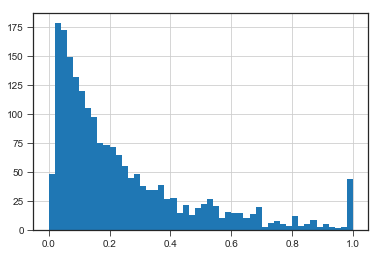

In [163]:
comm.ViolentCrimesPerPop.hist(bins=50)

In [164]:
comm["ViolentCrimesPerPopClass"] = (comm.ViolentCrimesPerPop > 0.46).astype(int)

### Benchmark
Sprawdźmy jak zachowa się regresja logistyczny przy wykorzystaniu wszystkich zmiennych w modelu. Będzie to dla nas pewien punkt wyjścia do porównań.

In [165]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import random
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))

aucs = []
aucsT = []
for train, test in kf.split(comm.index.values):
    mod = sm.GLM.from_formula(formula="ViolentCrimesPerPopClass ~ "+"+".join(features), data=comm.iloc[train], family=sm.families.Binomial())
    res = mod.fit()
    predsTrain = res.predict()
    preds = res.predict(comm.iloc[test])
    print("Train AUC:", roc_auc_score(comm.iloc[train].ViolentCrimesPerPopClass, predsTrain), "Valid AUC:", roc_auc_score(comm.iloc[test].ViolentCrimesPerPopClass, preds))
    aucs.append(roc_auc_score(comm.iloc[test].ViolentCrimesPerPopClass, preds))
    aucsT.append(roc_auc_score(comm.iloc[train].ViolentCrimesPerPopClass, predsTrain))
print(np.mean(aucsT), np.mean(aucs))


Train AUC: 0.9336317712066216 Valid AUC: 0.959704289879217
Train AUC: 0.9523128195285373 Valid AUC: 0.8687430478309232
Train AUC: 0.9429204460966543 Valid AUC: 0.9109626900046062
Train AUC: 0.9506057810578107 Valid AUC: 0.8811111111111112
Train AUC: 0.940983019819989 Valid AUC: 0.9139465875370919
0.9440907675419226 0.9068935452725899


### Ridge, Lasso and Elastic Net

In [ ]:
from sklearn import linear_model

In [167]:
from sklearn.model_selection import KFold
import random
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))
for alpha in [0.01, 0.1, 0.25, 0.5, 1, 2, 5]:
    aucs = []
    aucsT = []
    for train, test in kf.split(comm.index.values):
        reg = linear_model.Ridge (alpha = alpha)
        reg.fit(comm.iloc[train][features], comm.iloc[train]["ViolentCrimesPerPopClass"])
        predsTrain = reg.predict(comm.iloc[train][features])
        preds = reg.predict(comm.iloc[test][features])
#         print("Train AUC:", roc_auc_score(comm.iloc[train].ViolentCrimesPerPopClass, predsTrain), "Valid AUC:", roc_auc_score(comm.iloc[test].ViolentCrimesPerPopClass, preds))
        aucs.append(roc_auc_score(comm.iloc[test].ViolentCrimesPerPopClass, preds))
        aucsT.append(roc_auc_score(comm.iloc[train].ViolentCrimesPerPopClass, predsTrain))
    print(alpha, np.mean(aucsT), np.mean(aucs))


0.01 0.9335466449031422 0.9069712873778915
0.1 0.9334767759823765 0.9082775753363567
0.25 0.9332434240559584 0.9087260370899072
0.5 0.9327648253807709 0.909573416046326
1 0.9319397002157551 0.9103985672289419
2 0.9307958451816823 0.9111720497040213
5 0.9286823174548324 0.912414786002224


In [168]:
from sklearn.model_selection import KFold
import random
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))
for alpha in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.025]:
    aucs = []
    aucsT = []
    for train, test in kf.split(comm.index.values):
        reg = linear_model.Lasso (alpha = alpha)
        reg.fit(comm.iloc[train][features], comm.iloc[train]["ViolentCrimesPerPopClass"])
        predsTrain = reg.predict(comm.iloc[train][features])
        preds = reg.predict(comm.iloc[test][features])
#         print("Train AUC:", roc_auc_score(comm.iloc[train].ViolentCrimesPerPopClass, predsTrain), "Valid AUC:", roc_auc_score(comm.iloc[test].ViolentCrimesPerPopClass, preds))
        aucs.append(roc_auc_score(comm.iloc[test].ViolentCrimesPerPopClass, preds))
        aucsT.append(roc_auc_score(comm.iloc[train].ViolentCrimesPerPopClass, predsTrain))
    print(alpha, np.mean(aucsT), np.mean(aucs))


/home/wilam/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.0001 0.9315511713115452 0.912176255104813
0.0005 0.9247685802223916 0.9130370201197608
0.001 0.9206005909943593 0.9118052483195396
0.005 0.910800700392565 0.9067502801546088
0.01 0.9024817690137977 0.8998311050197689
0.025 0.8978798785696208 0.8984886374535884


In [170]:
from sklearn.model_selection import KFold
import random
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))
for ratio in [0.1, 0.25, 0.5, 0.75, 0.9]:
    for alpha in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.025]:
        aucs = []
        aucsT = []
        for train, test in kf.split(comm.index.values):
            reg = linear_model.ElasticNet (alpha = alpha, l1_ratio=ratio)
            reg.fit(comm.iloc[train][features], comm.iloc[train]["ViolentCrimesPerPopClass"])
            predsTrain = reg.predict(comm.iloc[train][features])
            preds = reg.predict(comm.iloc[test][features])
#             print("Train AUC:", roc_auc_score(comm.iloc[train].ViolentCrimesPerPopClass, predsTrain), "Valid AUC:", roc_auc_score(comm.iloc[test].ViolentCrimesPerPopClass, preds))
            aucs.append(roc_auc_score(comm.iloc[test].ViolentCrimesPerPopClass, preds))
            aucsT.append(roc_auc_score(comm.iloc[train].ViolentCrimesPerPopClass, predsTrain))
        print("Ratio: ", ratio, ", alpha:", alpha, np.mean(aucsT), np.mean(aucs))


/home/wilam/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Ratio:  0.1 , alpha: 0.0001 0.9333933966915098 0.9087898692116749
Ratio:  0.1 , alpha: 0.0005 0.931630057458143 0.9117860296867372
Ratio:  0.1 , alpha: 0.001 0.9300160012440071 0.9124579365079295
Ratio:  0.1 , alpha: 0.005 0.9237424467803574 0.9148265946067099
Ratio:  0.1 , alpha: 0.01 0.9206315969587177 0.9147503204960487
Ratio:  0.1 , alpha: 0.025 0.9172792975283123 0.9138089994505828
Ratio:  0.25 , alpha: 0.0001 0.9331662610349643 0.9093232773279253
Ratio:  0.25 , alpha: 0.0005 0.9304980308433507 0.912247615732802
Ratio:  0.25 , alpha: 0.001 0.9279539991598291 0.9134416640308748
Ratio:  0.25 , alpha: 0.005 0.9198783913058396 0.9150930226265371
Ratio:  0.25 , alpha: 0.01 0.9170818540234466 0.9137337703714291
Ratio:  0.25 , alpha: 0.025 0.9135520922307461 0.910800421963099
Ratio:  0.5 , alpha: 0.0001 0.932720418682494 0.9099742504563743
Ratio:  0.5 , alpha: 0.0005 0.9285786033625871 0.9131096556795752
Ratio:  0.5 , alpha: 0.001 0.9249404000532907 0.9140937985643358
Ratio:  0.5 , alpha

### Comparison to alternative solution to corellation - stakcing.

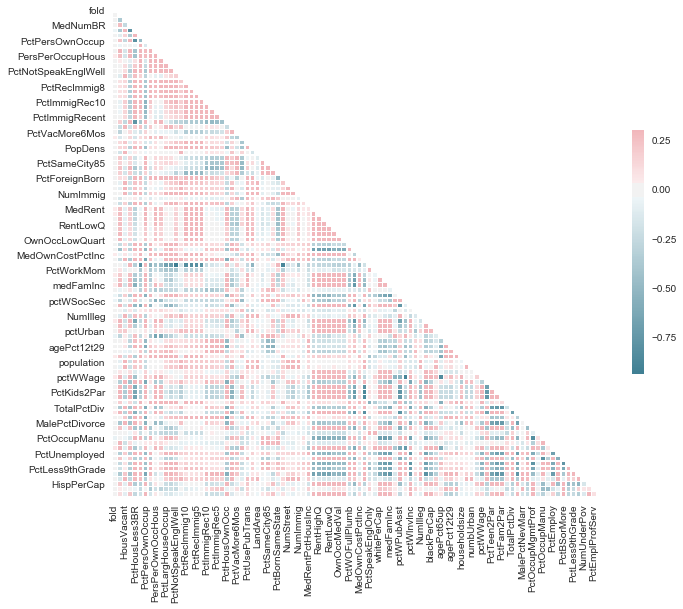

In [172]:
import seaborn as sns
sns.set(style="white")
# Compute the correlation matrix
corr = comm[features].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [175]:
corr = comm[features].corr(method="spearman")
for row in corr.iterrows():
    s = row[1]
    print(row[0])
    print(s[np.abs(s)>0.8])
    print(s[np.abs(s)>0.8].index.tolist())
    print("\n")

fold
fold    1.0
Name: fold, dtype: float64
['fold']


PctHousOccup
PctHousOccup    1.0
Name: PctHousOccup, dtype: float64
['PctHousOccup']


HousVacant
HousVacant    1.0
Name: HousVacant, dtype: float64
['HousVacant']


MedNumBR
MedNumBR          1.000000
PctHousLess3BR   -0.849387
Name: MedNumBR, dtype: float64
['MedNumBR', 'PctHousLess3BR']


PctHousLess3BR
MedNumBR         -0.849387
PctHousLess3BR    1.000000
Name: PctHousLess3BR, dtype: float64
['MedNumBR', 'PctHousLess3BR']


PctPersDenseHous
PctPersDenseHous    1.0
Name: PctPersDenseHous, dtype: float64
['PctPersDenseHous']


PctPersOwnOccup
PctPersOwnOccup    1.000000
PctHousOwnOcc      0.977963
Name: PctPersOwnOccup, dtype: float64
['PctPersOwnOccup', 'PctHousOwnOcc']


PersPerRentOccHous
PersPerRentOccHous    1.0
Name: PersPerRentOccHous, dtype: float64
['PersPerRentOccHous']


PersPerOwnOccHous
PersPerOwnOccHous    1.000000
PersPerOccupHous     0.894069
PersPerFam           0.847186
Name: PersPerOwnOccHous, dtype: float64
['

In [176]:
corrGroups = [
['PersPerOwnOccHous', 'PersPerOccupHous', 'householdsize', 'PersPerFam'],
['PctNotSpeakEnglWell', 'PctRecImmig10', 'PctRecImmig8', 'PctRecImmig5', 'PctRecentImmig', 'PctForeignBorn', 'NumImmig', 'PctSpeakEnglOnly'],
['MedRent', 'RentHighQ', 'RentMedian', 'RentLowQ', 'OwnOccHiQuart', 'OwnOccMedVal', 'OwnOccLowQuart', 'medFamInc', 'medIncome'],
['PctHousNoPhone', 'perCapInc', 'medFamInc', 'pctWInvInc', 'medIncome', 'PctKids2Par', 'PctYoungKids2Par', 'PctPopUnderPov'],
]

In [177]:
from sklearn import neighbors
n_neighbors = 30
clf = neighbors.KNeighborsClassifier(n_neighbors, n_jobs=-1, p=2)
for i, group in enumerate(corrGroups):
    clf.fit(comm[group].values, comm["ViolentCrimesPerPopClass"].values)
    comm["group_"+str(i)] = clf.predict_proba(comm[group].values)[:,0]
for i, group in enumerate(corrGroups):
    features.append("group_"+str(i))
    for var in group:
        try:
            features.remove(var)
        except:
            pass
print(len(features))

73


In [178]:
from sklearn.model_selection import KFold
import random
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))
for alpha in [0.01, 0.1, 0.25, 0.5, 1, 2, 5]:
    aucs = []
    aucsT = []
    for train, test in kf.split(comm.index.values):
        reg = linear_model.Ridge (alpha = alpha)
        reg.fit(comm.iloc[train][features], comm.iloc[train]["ViolentCrimesPerPopClass"])
        predsTrain = reg.predict(comm.iloc[train][features])
        preds = reg.predict(comm.iloc[test][features])
#         print("Train AUC:", roc_auc_score(comm.iloc[train].ViolentCrimesPerPopClass, predsTrain), "Valid AUC:", roc_auc_score(comm.iloc[test].ViolentCrimesPerPopClass, preds))
        aucs.append(roc_auc_score(comm.iloc[test].ViolentCrimesPerPopClass, preds))
        aucsT.append(roc_auc_score(comm.iloc[train].ViolentCrimesPerPopClass, predsTrain))
    print(alpha, np.mean(aucsT), np.mean(aucs))


0.01 0.9475752452353857 0.9320859031571521
0.1 0.9473117634927721 0.9329080156543856
0.25 0.9470386736793793 0.9334147658693057
0.5 0.946735244027936 0.9339007860511209
1 0.9462909630579563 0.9346999352063949
2 0.945618818726617 0.9351153862197833
5 0.9443771852738037 0.935184894415815


In [179]:
from sklearn.model_selection import KFold
import random
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))
for alpha in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.025]:
    aucs = []
    aucsT = []
    for train, test in kf.split(comm.index.values):
        reg = linear_model.Lasso (alpha = alpha)
        reg.fit(comm.iloc[train][features], comm.iloc[train]["ViolentCrimesPerPopClass"])
        predsTrain = reg.predict(comm.iloc[train][features])
        preds = reg.predict(comm.iloc[test][features])
#         print("Train AUC:", roc_auc_score(comm.iloc[train].ViolentCrimesPerPopClass, predsTrain), "Valid AUC:", roc_auc_score(comm.iloc[test].ViolentCrimesPerPopClass, preds))
        aucs.append(roc_auc_score(comm.iloc[test].ViolentCrimesPerPopClass, preds))
        aucsT.append(roc_auc_score(comm.iloc[train].ViolentCrimesPerPopClass, predsTrain))
    print(alpha, np.mean(aucsT), np.mean(aucs))


0.0001 0.9460577285086078 0.932399450065042
0.0005 0.9429315811592194 0.9355347518834476
0.001 0.941539214810821 0.9361093634575326
0.005 0.9337750398277326 0.9315522765164752
0.01 0.9272699734423732 0.9265688803518788
0.025 0.9256226189161693 0.9247999031541376


In [180]:
from sklearn.model_selection import KFold
import random
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))
for ratio in [0.1, 0.25, 0.5, 0.75, 0.9]:
    for alpha in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.025]:
        aucs = []
        aucsT = []
        for train, test in kf.split(comm.index.values):
            reg = linear_model.ElasticNet (alpha = alpha, l1_ratio=ratio)
            reg.fit(comm.iloc[train][features], comm.iloc[train]["ViolentCrimesPerPopClass"])
            predsTrain = reg.predict(comm.iloc[train][features])
            preds = reg.predict(comm.iloc[test][features])
#             print("Train AUC:", roc_auc_score(comm.iloc[train].ViolentCrimesPerPopClass, predsTrain), "Valid AUC:", roc_auc_score(comm.iloc[test].ViolentCrimesPerPopClass, preds))
            aucs.append(roc_auc_score(comm.iloc[test].ViolentCrimesPerPopClass, preds))
            aucsT.append(roc_auc_score(comm.iloc[train].ViolentCrimesPerPopClass, predsTrain))
        print(alpha, np.mean(aucsT), np.mean(aucs))


0.0001 0.9470612172728453 0.935179814711298
0.0005 0.9460000358229358 0.9363346273889184
0.001 0.9451039672663155 0.9369340121725314
0.005 0.9415978347003726 0.9387330478617478
0.01 0.9388686119308719 0.9369282389029125
0.025 0.9345822013281389 0.9332799877837005
0.0001 0.9469251158052749 0.9354004313197499
0.0005 0.945304432816849 0.9369757994365022
0.001 0.9439757815917409 0.9375484486083903
0.005 0.9398714352935962 0.9382629842987773
0.01 0.9368691580892206 0.9356099395700882
0.025 0.9328805987799997 0.9313127557914573
0.0001 0.9466377636905428 0.9356639832834738
0.0005 0.9441602771654877 0.9372785684102627
0.001 0.942676487904666 0.9385150161991909
0.005 0.9373657343027789 0.9359884135215853
0.01 0.9345819863436322 0.9334003259078815
0.025 0.9262493731836366 0.9256454384196307
0.0001 0.9463192260232283 0.9360297711044417
0.0005 0.9433076565330494 0.9377741061848027
0.001 0.9422073128536116 0.9388113516152561
0.005 0.9357118376680615 0.9344911854401226
0.01 0.9310885096936501 0.9301